<a href="https://colab.research.google.com/github/Shadman26/CNN_based_IDC_classification/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Invasive Ductal Carcinoma Classificaiton Model Based on Histopathological Images using CNN based Deep Learning Architectures.**

📊 The histopathology images were collected from Kaggle. The URL for the dataset is as Follows:
🔗 : https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images

##Dependencies

In [ ]:
#Import Dependencies
import zipfile
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import datetime
import tensorflow_hub as hub
from tensorflow.keras import layers
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import load_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
#import tensorflow_addons as tfa

In [ ]:
!wget https://drive.google.com/file/d/1auXfQ2M-ZgYRQkxzwSBuO85XfLuRos-V/view?usp=sharing
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/IDC.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-12-19 18:45:16--  https://drive.google.com/file/d/1auXfQ2M-ZgYRQkxzwSBuO85XfLuRos-V/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 209.85.234.138, 209.85.234.101, 209.85.234.102, ...
Connecting to drive.google.com (drive.google.com)|209.85.234.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  64.95K  --.-KB/s    in 0.002s  

2021-12-19 18:45:17 (27.5 MB/s) - ‘view?usp=sharing’ saved [66510]



In [ ]:
!ls IDC/train/

0  1


In [ ]:
!ls IDC/test/

0  1


In [ ]:
!ls IDC/test/1

9177_idx5_x1001_y1201_class1.png  9256_idx5_x2501_y1001_class1.png
9177_idx5_x1001_y1251_class1.png  9256_idx5_x2501_y1051_class1.png
9177_idx5_x1001_y1301_class1.png  9256_idx5_x2501_y1101_class1.png
9177_idx5_x1001_y1351_class1.png  9256_idx5_x2501_y1151_class1.png
9177_idx5_x1001_y1401_class1.png  9256_idx5_x2501_y1201_class1.png
9177_idx5_x1001_y1451_class1.png  9256_idx5_x2501_y1251_class1.png
9177_idx5_x1001_y1501_class1.png  9256_idx5_x2501_y1301_class1.png
9177_idx5_x1001_y1551_class1.png  9256_idx5_x2501_y1351_class1.png
9177_idx5_x1001_y1601_class1.png  9256_idx5_x2501_y1401_class1.png
9177_idx5_x1001_y1651_class1.png  9256_idx5_x2501_y1451_class1.png
9177_idx5_x1051_y1251_class1.png  9256_idx5_x2501_y1501_class1.png
9177_idx5_x1051_y1301_class1.png  9256_idx5_x2501_y1551_class1.png
9177_idx5_x1051_y1351_class1.png  9256_idx5_x2501_y1601_class1.png
9177_idx5_x1051_y1401_class1.png  9256_idx5_x2501_y1651_class1.png
9177_idx5_x1051_y1451_class1.png  9256_idx5_x2501_y1701_class1

In [ ]:
import os

# Walk through IDC directory and list number of files
for dirpath, dirnames, filenames in os.walk("IDC"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'IDC'.
There are 2 directories and 1 images in 'IDC/test'.
There are 0 directories and 5386 images in 'IDC/test/1'.
There are 0 directories and 10010 images in 'IDC/test/0'.
There are 2 directories and 1 images in 'IDC/train'.
There are 0 directories and 12816 images in 'IDC/train/1'.
There are 0 directories and 21555 images in 'IDC/train/0'.


In [ ]:
# Get the class names (programmatically.
import pathlib
import numpy as np
data_dir = pathlib.Path("IDC/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
class_names = np.delete(class_names, 0)
print(class_names)

['0' '1']


In [ ]:
def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 5)
  #print(random_image)

  if target_class == "1":
    title = "Cancer"
  else:
    title = "Non Cancer"
  # Read in the image and plot it using matplotlib
  fig, axes = plt.subplots(1, 5, figsize=(10,5))

  for i in range(len(random_image)):
    img = mpimg.imread(target_folder + "/" + random_image[i])
    axes[i].imshow(img)
    axes[i].set_title(title)
    axes[i].axis("off")

  
  return img

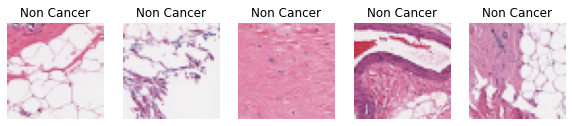

In [ ]:
img = view_random_image(target_dir = "IDC/train/", 
                        target_class = "0")

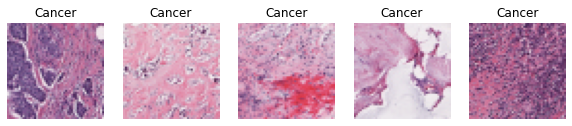

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="IDC/train/",
                        target_class="1")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

# Setup paths to our data directories
train_dir = "/content/IDC/train"
test_dir = "/content/IDC/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(50, 50),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(50, 50),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(50, 50, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=15,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        )

Found 34371 images belonging to 2 classes.
Found 15396 images belonging to 2 classes.
Epoch 1/15
1075/1075 [==============================] - 30s 27ms/step - loss: 0.4919 - accuracy: 0.7685 - val_loss: 0.4113 - val_accuracy: 0.8244
Epoch 2/15
1075/1075 [==============================] - 29s 27ms/step - loss: 0.4191 - accuracy: 0.8237 - val_loss: 0.4140 - val_accuracy: 0.8208
Epoch 3/15
1075/1075 [==============================] - 29s 27ms/step - loss: 0.4071 - accuracy: 0.8295 - val_loss: 0.4110 - val_accuracy: 0.8212
Epoch 4/15
1075/1075 [==============================] - 29s 27ms/step - loss: 0.3995 - accuracy: 0.8324 - val_loss: 0.4167 - val_accuracy: 0.8083
Epoch 5/15
1075/1075 [==============================] - 29s 27ms/step - loss: 0.3920 - accuracy: 0.8359 - val_loss: 0.4039 - val_accuracy: 0.8249
Epoch 6/15
1075/1075 [==============================] - 28s 26ms/step - loss: 0.3875 - accuracy: 0.8371 - val_loss: 0.3853 - val_accuracy: 0.8325
Epoch 7/15
1075/1075 [================

In [ ]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 10)        280       
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 10)        910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 10)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 10)        910       
                                                                 
 conv2d_8 (Conv2D)           (None, 19, 19, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 9, 9, 10)         0         
 2D)                                                  

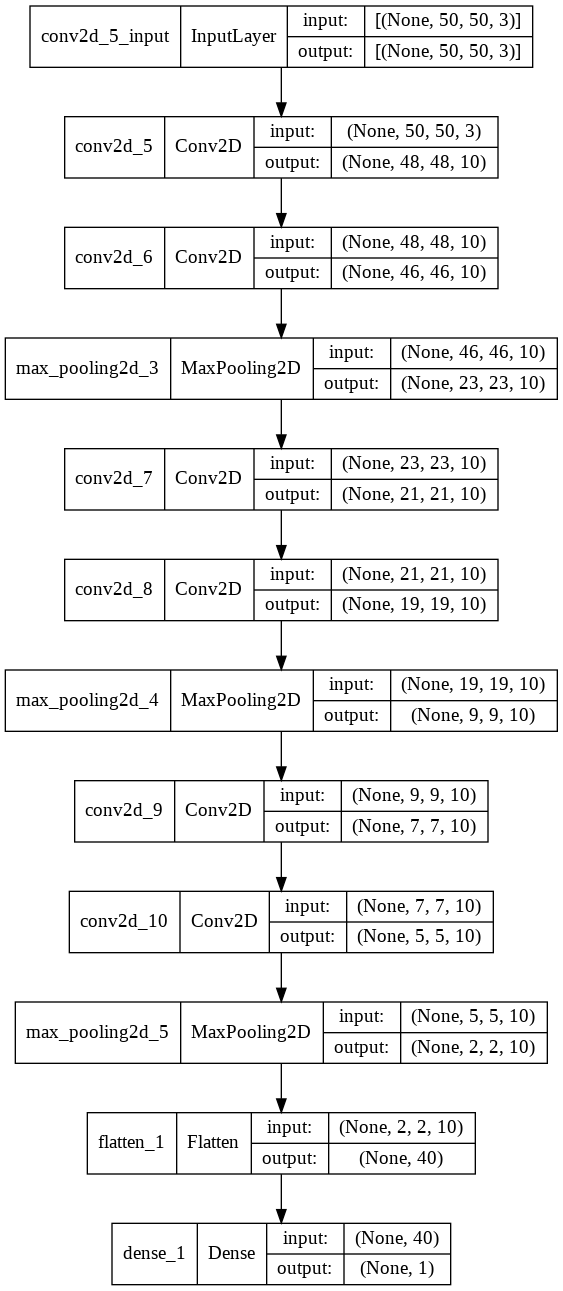

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model_1, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

Setup Data Inputs

In [ ]:
IMG_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "/content/IDC/train"
test_dir = "/content/IDC/test"

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

print("Training Images: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size = IMG_SHAPE,
                                               batch_size = BATCH_SIZE,
                                               class_mode = "binary")
print("Testing Images: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = IMG_SHAPE,
                                             batch_size = BATCH_SIZE,
                                             class_mode= "binary")

Training Images: 
Found 34371 images belonging to 2 classes.
Testing Images: 
Found 15396 images belonging to 2 classes.


In [ ]:
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
def create_model(model_url):
  """
   Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.
  
  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'feature_extractor',
                                           input_shape = IMG_SHAPE + (3,))
  
  input = Input(shape = IMG_SHAPE + (3,))
  vgg_extract = feature_extractor_layer (input)
  flat = Flatten()(vgg_extract[0])
  output = Dense(1, activation= "sigmoid")(flat)

  model = Model(inputs = input, outputs = output)

  return model

In [ ]:
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [ ]:
def create_model(model_url):
  """
   Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.

  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10.
  
  Returns:
    An uncompiled Keras Sequential model with model_url as feature extractor
    layer and Dense output layer with num_classes output neurons.
  """
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable = False,
                                           name = 'feature_extractor',
                                           input_shape = IMG_SHAPE + (3,))
  
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               #layers.Flatten(),
                               layers.Dense(1, activation = "sigmoid", name = "Output_layer")
  ])
  
  return model

In [ ]:
efficientnet_model = create_model(efficientnet_url)

In [ ]:
efficientnet_model.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])
efficientnet_history = efficientnet_model.fit(train_data,
                                              epochs = 15,
                                              steps_per_epoch = len(train_data),
                                              validation_data = test_data,
                                              validation_steps = len(test_data),
                                              )

Epoch 1/15
1075/1075 [==============================] - 167s 147ms/step - loss: 0.4162 - accuracy: 0.8131 - val_loss: 0.3506 - val_accuracy: 0.8618
Epoch 2/15
1075/1075 [==============================] - 156s 145ms/step - loss: 0.3726 - accuracy: 0.8363 - val_loss: 0.3386 - val_accuracy: 0.8665
Epoch 3/15
1075/1075 [==============================] - 156s 145ms/step - loss: 0.3583 - accuracy: 0.8434 - val_loss: 0.3474 - val_accuracy: 0.8620
Epoch 4/15
1075/1075 [==============================] - 156s 145ms/step - loss: 0.3496 - accuracy: 0.8481 - val_loss: 0.3442 - val_accuracy: 0.8662
Epoch 5/15
1075/1075 [==============================] - 156s 145ms/step - loss: 0.3442 - accuracy: 0.8500 - val_loss: 0.3504 - val_accuracy: 0.8599
Epoch 6/15
1075/1075 [==============================] - 156s 145ms/step - loss: 0.3393 - accuracy: 0.8531 - val_loss: 0.3483 - val_accuracy: 0.8620
Epoch 7/15
1075/1075 [==============================] - 156s 145ms/step - loss: 0.3354 - accuracy: 0.8561 - val_

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLay  (None, 1280)             5919312   
 er)                                                             
                                                                 
 Output_layer (Dense)        (None, 1)                 1281      
                                                                 
Total params: 5,920,593
Trainable params: 1,281
Non-trainable params: 5,919,312
_________________________________________________________________


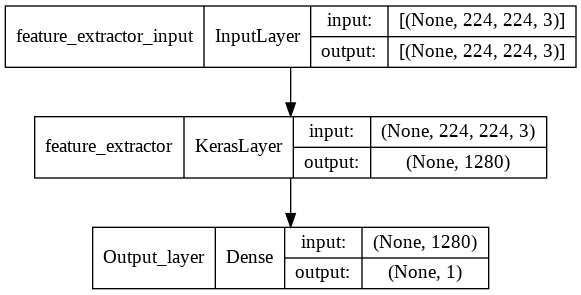

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(efficientnet_model, to_file='efficient.png', show_shapes=True,show_layer_names=True)
Image(filename='efficient.png') 

In [ ]:
inceptionV1_url = "https://tfhub.dev/google/imagenet/inception_v1/feature_vector/5"

In [ ]:
inceptionV1_model = create_model(inceptionV1_url)

In [ ]:
inceptionV1_model.compile(loss = "binary_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics = ["accuracy"])
InceptionV1_history = inceptionV1_model.fit(train_data,
                                              epochs = 15,
                                              steps_per_epoch = len(train_data),
                                              validation_data = test_data,
                                              validation_steps = len(test_data),
                                              )

Epoch 1/15
1075/1075 [==============================] - 147s 131ms/step - loss: 0.3724 - accuracy: 0.8346 - val_loss: 0.3389 - val_accuracy: 0.8696
Epoch 2/15
1075/1075 [==============================] - 139s 129ms/step - loss: 0.3301 - accuracy: 0.8583 - val_loss: 0.3609 - val_accuracy: 0.8555
Epoch 3/15
1075/1075 [==============================] - 139s 129ms/step - loss: 0.3179 - accuracy: 0.8648 - val_loss: 0.3557 - val_accuracy: 0.8625
Epoch 4/15
1075/1075 [==============================] - 139s 130ms/step - loss: 0.3118 - accuracy: 0.8693 - val_loss: 0.3752 - val_accuracy: 0.8465
Epoch 5/15
1075/1075 [==============================] - 139s 129ms/step - loss: 0.3067 - accuracy: 0.8715 - val_loss: 0.3562 - val_accuracy: 0.8589
Epoch 6/15
1075/1075 [==============================] - 139s 129ms/step - loss: 0.3041 - accuracy: 0.8717 - val_loss: 0.3672 - val_accuracy: 0.8524
Epoch 7/15
1075/1075 [==============================] - 139s 129ms/step - loss: 0.3031 - accuracy: 0.8726 - val_

In [ ]:
inceptionV1_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLay  (None, 1024)             5607184   
 er)                                                             
                                                                 
 Output_layer (Dense)        (None, 1)                 1025      
                                                                 
Total params: 5,608,209
Trainable params: 1,025
Non-trainable params: 5,607,184
_________________________________________________________________


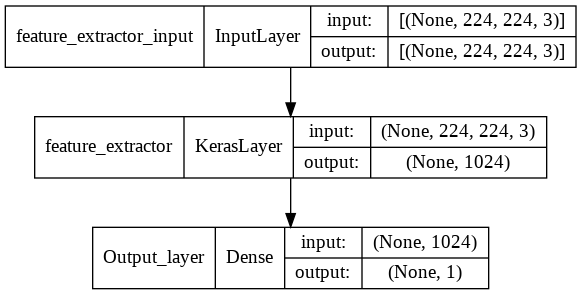

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(inceptionV1_model, to_file='inception.png', show_shapes=True,show_layer_names=True)
Image(filename='inception.png') 

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.xlim((0,9))
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.xlim((0,9))
  plt.legend()

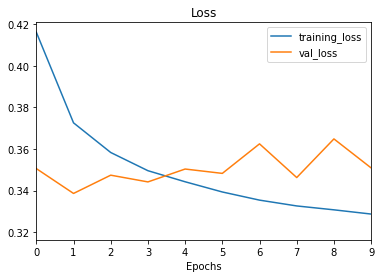

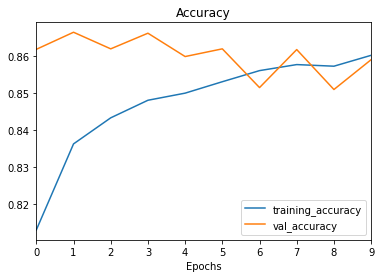

In [ ]:
plot_loss_curves(efficientnet_history)

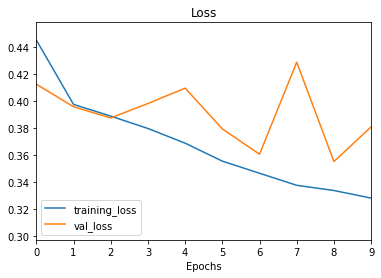

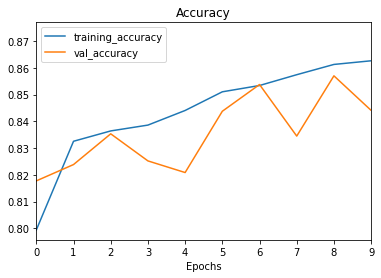

In [ ]:
plot_loss_curves(history_1)

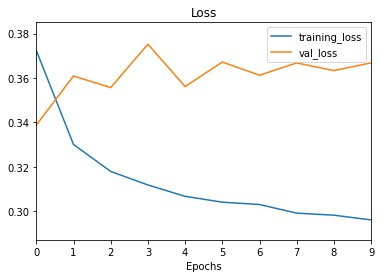

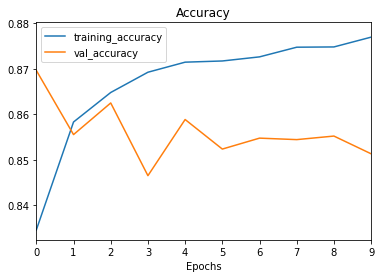

In [ ]:
plot_loss_curves(InceptionV1_history)

In [ ]:
!nvidia-smi

Sun Dec 19 16:44:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0    56W / 149W |   2332MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
!git init

Initialized empty Git repository in /content/.git/


In [7]:
!git commit -m "first commit"

On branch master

Initial commit

Untracked files:
	.config/
	sample_data/

nothing added to commit but untracked files present


In [4]:
!git config --global user.email "shadman_sss@outlook.com"
!git config --global user.name "Shadman"

In [8]:
!git branch -M main

error: refname refs/heads/master not found
fatal: Branch rename failed


In [9]:
!git add .

In [10]:
!git commit -m "first commit"

[master (root-commit) fbde9e9] first commit
 19 files changed, 50710 insertions(+)
 create mode 100644 .config/.last_opt_in_prompt.yaml
 create mode 100644 .config/.last_survey_prompt.yaml
 create mode 100644 .config/.last_update_check.json
 create mode 100644 .config/active_config
 create mode 100644 .config/config_sentinel
 create mode 100644 .config/configurations/config_default
 create mode 100644 .config/gce
 create mode 100644 .config/logs/2022.07.06/13.20.41.536125.log
 create mode 100644 .config/logs/2022.07.06/13.21.04.313145.log
 create mode 100644 .config/logs/2022.07.06/13.21.24.463860.log
 create mode 100644 .config/logs/2022.07.06/13.21.33.528230.log
 create mode 100644 .config/logs/2022.07.06/13.21.53.919535.log
 create mode 100644 .config/logs/2022.07.06/13.21.54.713715.log
 create mode 100755 sample_data/README.md
 create mode 100755 sample_data/anscombe.json
 create mode 100644 sample_data/california_housing_test.csv
 create mode 100644 sample_data/california_housing_

In [12]:
!git branch -M main

In [19]:
!git remote set-url origin git@github.com:Shadman26/CNN_based_IDC_classification.git

In [20]:
!git push -u origin main

Host key verification failed.
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [1]:
!pwd

/content
